In [2]:
# Import requests package
import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
df_weather_final = pd.read_csv('data/weather_df_2.csv')
df_weather_final

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,airport
0,2016-01-01,5.8,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
1,2016-01-02,3.1,1.1,5.0,0.0,0.0,277.0,20.9,NaN,1017.4,NaN,JFK
2,2016-01-03,4.6,1.7,8.9,0.0,0.0,258.0,22.7,NaN,1011.8,NaN,JFK
3,2016-01-04,1.0,-9.3,3.3,0.0,0.0,333.0,32.0,NaN,1017.7,NaN,JFK
4,2016-01-05,-7.2,-11.0,-1.6,0.0,0.0,351.0,19.8,NaN,1034.7,NaN,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...
181,2016-01-27,5.7,-0.5,8.9,0.0,100.0,333.0,15.5,NaN,1020.4,NaN,DCA
182,2016-01-28,0.4,-3.8,4.4,0.0,100.0,NaN,6.5,NaN,1014.0,NaN,DCA
183,2016-01-29,2.4,-2.1,6.1,0.0,80.0,280.0,19.4,NaN,1006.5,NaN,DCA
184,2016-01-30,0.8,-4.3,5.6,0.0,80.0,NaN,12.2,NaN,1018.4,NaN,DCA


In [27]:
df_weather_final['weather_date'] = pd.to_datetime(df_weather_final['weather_date'])
df_weather_final

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,airport
0,2016-01-01,5.8,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
1,2016-01-02,3.1,1.1,5.0,0.0,0.0,277.0,20.9,NaN,1017.4,NaN,JFK
2,2016-01-03,4.6,1.7,8.9,0.0,0.0,258.0,22.7,NaN,1011.8,NaN,JFK
3,2016-01-04,1.0,-9.3,3.3,0.0,0.0,333.0,32.0,NaN,1017.7,NaN,JFK
4,2016-01-05,-7.2,-11.0,-1.6,0.0,0.0,351.0,19.8,NaN,1034.7,NaN,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...
181,2016-01-27,5.7,-0.5,8.9,0.0,100.0,333.0,15.5,NaN,1020.4,NaN,DCA
182,2016-01-28,0.4,-3.8,4.4,0.0,100.0,NaN,6.5,NaN,1014.0,NaN,DCA
183,2016-01-29,2.4,-2.1,6.1,0.0,80.0,280.0,19.4,NaN,1006.5,NaN,DCA
184,2016-01-30,0.8,-4.3,5.6,0.0,80.0,NaN,12.2,NaN,1018.4,NaN,DCA


In [28]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   weather_date  186 non-null    datetime64[ns]
 1   weather_tavg  186 non-null    float64       
 2   weather_tmin  186 non-null    float64       
 3   weather_tmax  186 non-null    float64       
 4   weather_prcp  186 non-null    float64       
 5   weather_snow  186 non-null    float64       
 6   weather_wdir  145 non-null    float64       
 7   weather_wspd  186 non-null    float64       
 8   weather_wpgt  0 non-null      float64       
 9   weather_pres  183 non-null    float64       
 10  weather_tsun  0 non-null      float64       
 11  airport       186 non-null    object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 17.6+ KB


In [18]:
df_weather_final

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-04
4     2016-01-05
         ...    
181   2016-01-27
182   2016-01-28
183   2016-01-29
184   2016-01-30
185   2016-01-31
Name: weather_date, Length: 186, dtype: datetime64[ns]

In [5]:
from sql_functions import get_dataframe

In [6]:
df_f_a_merged = get_dataframe(f'''SELECT *
FROM cgn_analytics_24_3.flights_wj201601 f
LEFT JOIN cgn_analytics_24_3.airports a
ON f.origin = a.faa''')
df_f_a_merged.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,diverted,faa,name,lat,lon,alt,tz,dst,city,country
0,2016-01-01,741.0,745,-4.0,1610.0,1602,8.0,AA,N3HMAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
1,2016-01-02,737.0,745,-8.0,1613.0,1602,11.0,AA,N3BDAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
2,2016-01-03,743.0,745,-2.0,1547.0,1602,-15.0,AA,N3KJAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
3,2016-01-04,737.0,745,-8.0,1551.0,1602,-11.0,AA,N3FWAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States
4,2016-01-05,708.0,710,-2.0,1524.0,1527,-3.0,AA,N3ESAA,44,...,0,SEA,Seattle Tacoma International Airport,47.449001,-122.308998,433,-8.0,A,Seattle,United States


In [7]:
df_f_a_test = get_dataframe(f'''SELECT distinct dest,origin
FROM cgn_analytics_24_3.flights_wj201601 ''')
df_f_a_test.head(20)

,dest,origin
0,EWR,SLC
1,MDW,PHL
2,DCA,DAL
3,DCA,PIT
4,LGA,MSP
5,DCA,CMH
6,PHL,SAN
7,LGA,IND
8,PSP,JFK
9,HNL,JFK


In [8]:
df_f_a_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76945 entries, 0 to 76944
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          76945 non-null  datetime64[ns]
 1   dep_time             71033 non-null  float64       
 2   sched_dep_time       76945 non-null  int64         
 3   dep_delay            71033 non-null  float64       
 4   arr_time             70988 non-null  float64       
 5   sched_arr_time       76945 non-null  int64         
 6   arr_delay            70884 non-null  float64       
 7   airline              76945 non-null  object        
 8   tail_number          74181 non-null  object        
 9   flight_number        76945 non-null  int64         
 10  origin               76945 non-null  object        
 11  dest                 76945 non-null  object        
 12  air_time             70884 non-null  float64       
 13  actual_elapsed_time  70884 non-

In [116]:
df_f_a_merged['origin'].value_counts()

origin
EWR    8526
LGA    8028
JFK    8027
DCA    6447
PHL    5664
       ... 
BGR       2
OKC       2
XNA       1
AVL       1
BTR       1
Name: count, Length: 104, dtype: int64

In [ ]:
# use merge
#  join on date and airport name
# use left_on and right_on, read merge documentation

In [ ]:
##df_flights_airports_origin = df_f_a_merged[df_f_a_merged[‘origin’].isin([‘JFK’, ‘LGA’, ‘EWR’, ‘PHL’, ‘IAD’, ‘DCA’])]

In [ ]:
df_weather_final_jfk_origin['origin'].value_counts()

In [ ]:

###df_merged_final = pd.merge(df_f_a_merged,df_weather_final,left_on=['flight_date','faa'], right_on= ['weather_date','airport'])#,how = 'left')
#df_merged_final

worked on origin of airports

In [29]:
## Im going to work with this data
df_merged_final = pd.merge(df_f_a_merged,df_weather_final,left_on=['flight_date','origin'], right_on= ['weather_date','airport'])#,how = 'left')
df_merged_final

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,airport
0,2016-01-01,1819.0,1825,-6.0,2125.0,2150,-25.0,AA,N3MWAA,45,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
1,2016-01-01,1553.0,1545,8.0,2007.0,1909,58.0,AA,N396AA,65,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
2,2016-01-01,926.0,930,-4.0,1253.0,1236,17.0,AA,N5FHAA,75,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
3,2016-01-01,1552.0,1545,7.0,1657.0,1703,-6.0,AA,N796AA,199,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
4,2016-01-01,754.0,755,-1.0,1055.0,1114,-19.0,AA,N5EVAA,200,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39224,2016-01-31,1324.0,1323,1.0,1518.0,1525,-7.0,DL,N971DL,1125,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD
39225,2016-01-31,1225.0,1230,-5.0,1359.0,1413,-14.0,EV,N851AS,4995,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD
39226,2016-01-31,1722.0,1727,-5.0,1924.0,1915,9.0,EV,N851AS,4970,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD
39227,2016-01-31,634.0,635,-1.0,802.0,830,-28.0,EV,N709EV,5140,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD


In [118]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39229 entries, 0 to 39228
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          39229 non-null  datetime64[ns]
 1   dep_time             36192 non-null  float64       
 2   sched_dep_time       39229 non-null  int64         
 3   dep_delay            36192 non-null  float64       
 4   arr_time             36173 non-null  float64       
 5   sched_arr_time       39229 non-null  int64         
 6   arr_delay            36127 non-null  float64       
 7   airline              39229 non-null  object        
 8   tail_number          37746 non-null  object        
 9   flight_number        39229 non-null  int64         
 10  origin               39229 non-null  object        
 11  dest                 39229 non-null  object        
 12  air_time             36127 non-null  float64       
 13  actual_elapsed_time  36127 non-

In [30]:
df_merged_final.describe()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight_number,air_time,actual_elapsed_time,...,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
count,39229,36192.000000,39229.000000,36192.000000,36173.00000,39229.000000,36127.000000,39229.000000,36127.000000,36127.000000,...,39229.000000,39229.000000,39229.000000,39229.000000,39229.000000,31796.000000,39229.000000,0.0,38766.000000,0.0
mean,2016-01-15 22:06:03.588161792,1344.271883,1336.921512,9.450569,1500.08863,1524.065742,-1.011958,1613.958449,157.202286,185.699311,...,1.072933,-3.485314,5.279943,2.611624,89.580922,237.405617,16.875612,NaN,1017.004058,NaN
min,2016-01-01 00:00:00,1.000000,500.000000,-28.000000,1.00000,1.000000,-79.000000,1.000000,20.000000,31.000000,...,-8.200000,-15.500000,-3.200000,0.000000,0.000000,5.000000,2.200000,NaN,1000.300000,NaN
25%,2016-01-08 00:00:00,905.000000,900.000000,-5.000000,1108.00000,1124.000000,-21.000000,577.000000,92.000000,118.000000,...,-2.100000,-6.600000,2.200000,0.000000,0.000000,202.000000,11.200000,NaN,1012.700000,NaN
50%,2016-01-16 00:00:00,1353.000000,1345.000000,-2.000000,1531.00000,1545.000000,-10.000000,1365.000000,140.000000,168.000000,...,1.300000,-3.800000,5.600000,0.000000,0.000000,272.000000,15.500000,NaN,1017.200000,NaN
75%,2016-01-24 00:00:00,1744.000000,1735.000000,7.000000,1940.00000,1949.000000,6.000000,2115.000000,200.000000,229.000000,...,3.700000,-0.500000,7.800000,0.000000,130.000000,305.000000,21.600000,NaN,1021.100000,NaN
max,2016-01-31 00:00:00,2400.000000,2359.000000,1162.000000,2400.00000,2359.000000,1158.000000,6877.000000,698.000000,721.000000,...,13.000000,6.100000,18.300000,73.700000,710.000000,355.000000,40.300000,NaN,1036.500000,NaN
std,NaN,487.724007,473.765297,38.035101,530.82500,511.173662,41.242305,1351.425155,91.136311,92.846121,...,4.108735,4.144372,4.471131,9.687426,167.032832,97.137812,8.338211,NaN,7.850359,NaN


In [ ]:
# later for manual check
# 31-01-2016 snow_fall =360 airport =  IAD
# 29-01-2016 snow_fall =380 airport = IAD

In [ ]:
##df_merged_final = pd.merge(df_f_a_merged,df_weather_final,left_on=['flight_date','dest'], right_on= ['weather_date','airport'])#,how = 'left')
##df_merged_final

In [ ]:
#airports=['JFK', 'LGA', 'EWR', 'PHL', 'IAD', 'DCA']
#df_f_a_merged.loc[(df_f_a_merged.origin.isin(airports)) & (df_f_a_merged.dest.isin(airports))]

In [ ]:
## groupby indivdual date, count (cancellation , dep_delay), x axis = dates ,y axis= cancellation, dep_delay (this is in flight section)
 ## y axis =  cancellation , x axis = snow_fall for all 6 aiports together
## indivdual airpots 


In [31]:
df = df_merged_final.groupby('flight_date').agg({
    'dep_delay': 'mean',
    'arr_delay': 'mean',
    'cancelled':'sum',
    'weather_tmin': 'mean',
    'weather_tmax': 'mean',
    'weather_prcp': 'mean',
    'weather_snow': 'mean',
    'weather_wdir': 'mean',
    'weather_wspd': 'mean',
    'weather_wpgt': 'mean',
    'weather_pres': 'mean',
    'weather_tsun': 'mean'
})
df

,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
flight_date,,,,,,,,,,,,
2016-01-01,6.950540,-3.193694,2,1.350854,6.553908,0.000000,0.000000,282.552561,19.375022,NaN,1018.240701,NaN
2016-01-02,10.138500,-6.408079,3,-0.436760,6.384951,0.000000,0.000000,258.393617,14.550658,NaN,1017.903783,NaN
2016-01-03,13.376888,6.331316,5,-1.003837,9.537321,0.000000,0.000000,245.865369,16.488412,NaN,1012.275696,NaN
2016-01-04,12.548936,-2.422285,2,-8.942807,2.507016,0.000000,0.000000,330.780298,27.969029,NaN,1018.725797,NaN
2016-01-05,10.640212,-3.338124,10,-11.086712,-0.337012,0.000000,0.000000,336.450161,16.142492,NaN,1035.354354,NaN
2016-01-06,8.099398,-6.776018,5,-8.215304,4.925731,0.000000,0.000000,219.829327,8.367067,NaN,1034.023856,NaN
2016-01-07,3.991202,-14.275330,6,-2.821987,7.257195,0.000000,0.000000,NaN,4.698101,NaN,1026.189116,NaN
2016-01-08,5.133630,-8.749627,8,0.965683,7.308266,0.050185,0.000000,34.552756,11.171661,NaN,1022.378191,NaN
2016-01-09,3.603412,-8.113006,4,4.285032,10.356369,1.554777,0.000000,43.802945,11.913163,NaN,1020.391401,NaN


In [32]:
df = df.reset_index()
df


,flight_date,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,2016-01-01,6.950540,-3.193694,2,1.350854,6.553908,0.000000,0.000000,282.552561,19.375022,NaN,1018.240701,NaN
1,2016-01-02,10.138500,-6.408079,3,-0.436760,6.384951,0.000000,0.000000,258.393617,14.550658,NaN,1017.903783,NaN
2,2016-01-03,13.376888,6.331316,5,-1.003837,9.537321,0.000000,0.000000,245.865369,16.488412,NaN,1012.275696,NaN
3,2016-01-04,12.548936,-2.422285,2,-8.942807,2.507016,0.000000,0.000000,330.780298,27.969029,NaN,1018.725797,NaN
4,2016-01-05,10.640212,-3.338124,10,-11.086712,-0.337012,0.000000,0.000000,336.450161,16.142492,NaN,1035.354354,NaN
5,2016-01-06,8.099398,-6.776018,5,-8.215304,4.925731,0.000000,0.000000,219.829327,8.367067,NaN,1034.023856,NaN
6,2016-01-07,3.991202,-14.275330,6,-2.821987,7.257195,0.000000,0.000000,NaN,4.698101,NaN,1026.189116,NaN
7,2016-01-08,5.133630,-8.749627,8,0.965683,7.308266,0.050185,0.000000,34.552756,11.171661,NaN,1022.378191,NaN
8,2016-01-09,3.603412,-8.113006,4,4.285032,10.356369,1.554777,0.000000,43.802945,11.913163,NaN,1020.391401,NaN
9,2016-01-10,26.922948,19.308144,28,3.846563,16.951146,31.500327,0.000000,175.698036,27.322668,NaN,1002.109290,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

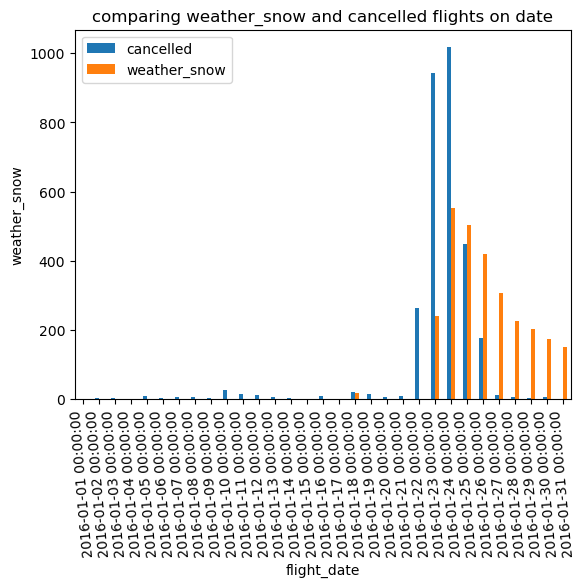

In [33]:
df.plot(x="flight_date", y=["cancelled", "weather_snow"], kind="bar", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=95)
plt.show

In [1]:
df.plot(x="flight_date", y=["cancelled", "weather_snow","dep_delay"], kind="line", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow','dep_delay')
plt.xticks(rotation=95)
plt.show

NameError: name 'df' is not defined

/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:111

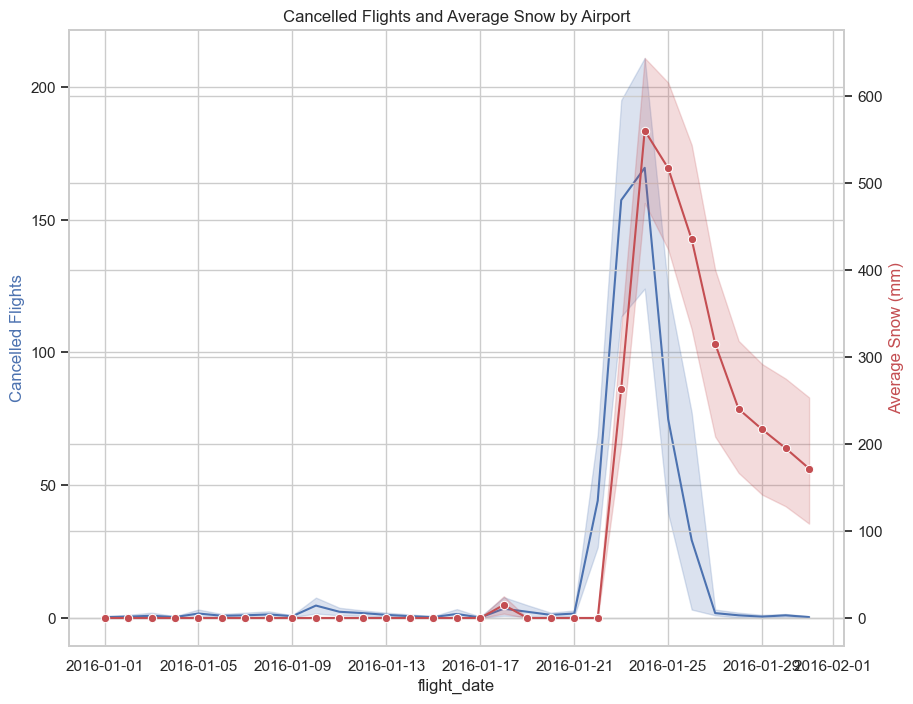

In [95]:
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.lineplot(x='flight_date', y='cancelled', data=df1, ax=ax1, color='b')
ax1.set_ylabel('Cancelled Flights', color='b')
ax1.set_title('Cancelled Flights and Average Snow by Airport')

# Create a second y-axis to plot weather_snow
ax2 = ax1.twinx()
sns.lineplot(x='flight_date', y='weather_snow', data=df1, ax=ax2, marker='o', color='r')
ax2.set_ylabel('Average Snow (mm)', color='r')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

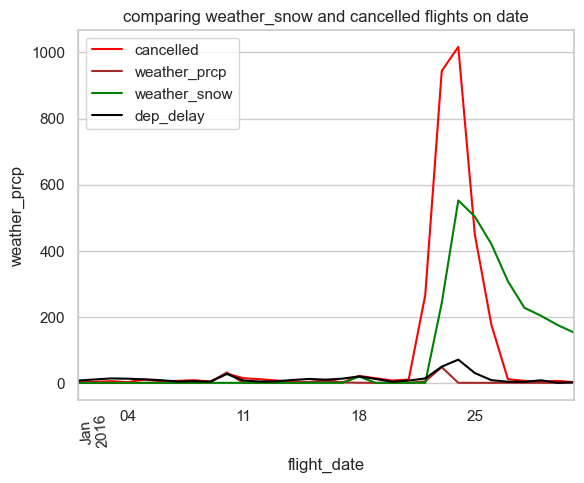

In [123]:
df.plot(x="flight_date", y=["cancelled", "weather_prcp","weather_snow","dep_delay"], kind="line", rot=0,alpha = 1, color = ('red','brown','green','black'))
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_prcp')
plt.xticks(rotation=95)
plt.show

try to split according to impact

In [35]:
def rows_by_dates(df, start_date,end_date):
    # Convert start and end dates to datetime if they are not already
    #start_date = pd.to_datetime(start_date)
    #end_date = pd.to_datetime(end_date)
  return df[(df['flight_date'] >= start_date) & (df['flight_date'] <= end_date)]



In [36]:
df_before_blizzard= rows_by_dates(df, '2016-01-17', '2016-01-21')
df_before_blizzard

,flight_date,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
16,2016-01-17,12.729073,16.339946,1,-0.945144,5.148651,1.388309,0.000000,341.525180,13.867806,NaN,1009.518615,NaN
17,2016-01-18,19.467226,18.421815,21,-7.798200,-0.199400,0.343886,18.927232,284.352588,29.770968,NaN,1012.644636,NaN
18,2016-01-19,11.687596,3.752490,14,-8.782335,-1.095527,0.000000,0.000000,289.365428,29.914253,NaN,1020.059591,NaN
19,2016-01-20,3.360483,-7.033988,7,-4.222431,2.651838,0.137434,0.000000,297.904647,15.100675,NaN,1022.309002,NaN
20,2016-01-21,6.824305,-1.509158,10,-3.496730,2.777544,0.000000,0.000000,318.889535,20.275073,NaN,1022.141933,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

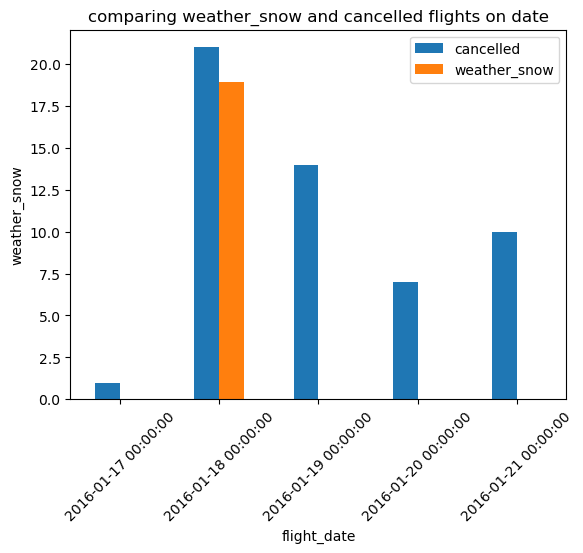

In [37]:
df_before_blizzard.plot(x="flight_date", y=["cancelled", "weather_snow"], kind="bar", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=45)
plt.show

In [38]:
df_during_blizzard= rows_by_dates(df, '2016-01-22', '2016-01-26')
df_during_blizzard

,flight_date,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
21,2016-01-22,13.404525,7.018215,265,-6.424251,-1.321695,4.481081,0.000000,10.956172,17.048210,NaN,1023.628196,NaN
22,2016-01-23,49.000000,NaN,944,-4.365890,-1.645339,47.482309,241.885593,99.095339,37.747140,NaN,1007.259569,NaN
23,2016-01-24,70.303483,52.810945,1017,-7.734154,1.808374,0.118227,552.159278,323.079017,16.161248,NaN,1014.889245,NaN
24,2016-01-25,29.645267,13.125409,449,-8.064155,3.875933,0.000000,503.262619,NaN,4.377762,NaN,1024.406291,NaN
25,2016-01-26,8.094820,-3.197889,176,-2.615133,8.722510,0.000000,420.182510,202.482840,11.479772,NaN,1017.849125,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

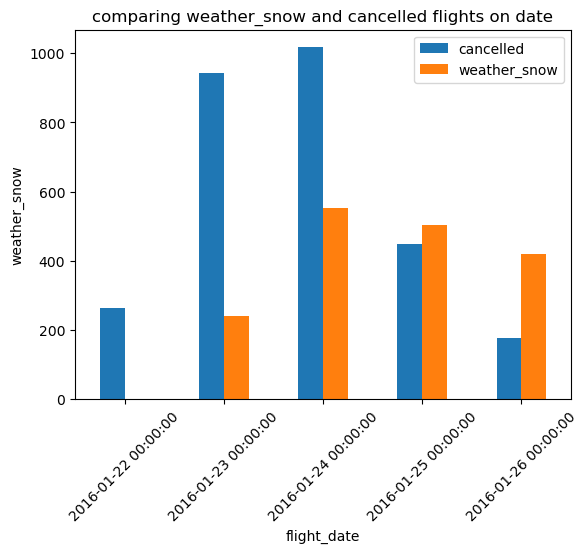

In [39]:
df_during_blizzard.plot(x="flight_date", y=["cancelled", "weather_snow"], kind="bar", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=45)
plt.show

In [40]:
df_after_blizzard= rows_by_dates(df, '2016-01-27', '2016-01-31')
df_after_blizzard

,flight_date,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
26,2016-01-27,3.313116,-1.988619,11,-0.737895,7.488872,0.149549,307.676692,300.902889,16.070752,NaN,1018.058346,NaN
27,2016-01-28,3.068663,-5.538743,6,-4.569091,5.469236,0.000000,227.025455,NaN,6.221527,NaN,1013.814836,NaN
28,2016-01-29,7.732405,-7.097651,3,-1.482370,5.316020,0.018654,203.079737,280.874286,18.107535,NaN,1003.176884,NaN
29,2016-01-30,0.157219,-14.804278,6,-3.796493,4.638257,0.000000,175.132837,240.976616,14.181509,NaN,1017.167800,NaN
30,2016-01-31,2.048922,-10.694676,2,0.021689,12.304056,0.000000,152.144040,201.549669,10.737748,NaN,1013.226325,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

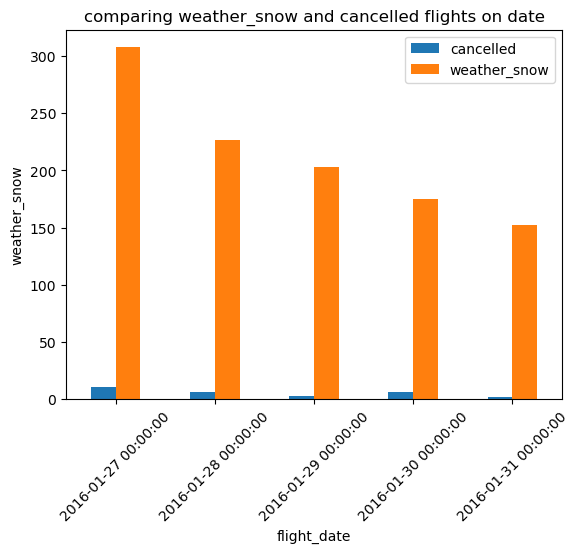

In [41]:
df_after_blizzard.plot(x="flight_date", y=["cancelled", "weather_snow"], kind="bar", rot=0,alpha = 1)
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=45)
plt.show

In [42]:
df_after_blizzard['period'] = 'After'
df_during_blizzard['period'] = 'During'
df_before_blizzard['period'] = 'Before'


/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/3374563315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_blizzard['period'] = 'After'
/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/3374563315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_during_blizzard['period'] = 'During'
/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/3374563315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [43]:
combined_blizzard = pd.concat([df_before_blizzard,df_during_blizzard,df_after_blizzard])
combined_blizzard

,flight_date,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,period
16,2016-01-17,12.729073,16.339946,1,-0.945144,5.148651,1.388309,0.000000,341.525180,13.867806,NaN,1009.518615,NaN,Before
17,2016-01-18,19.467226,18.421815,21,-7.798200,-0.199400,0.343886,18.927232,284.352588,29.770968,NaN,1012.644636,NaN,Before
18,2016-01-19,11.687596,3.752490,14,-8.782335,-1.095527,0.000000,0.000000,289.365428,29.914253,NaN,1020.059591,NaN,Before
19,2016-01-20,3.360483,-7.033988,7,-4.222431,2.651838,0.137434,0.000000,297.904647,15.100675,NaN,1022.309002,NaN,Before
20,2016-01-21,6.824305,-1.509158,10,-3.496730,2.777544,0.000000,0.000000,318.889535,20.275073,NaN,1022.141933,NaN,Before
21,2016-01-22,13.404525,7.018215,265,-6.424251,-1.321695,4.481081,0.000000,10.956172,17.048210,NaN,1023.628196,NaN,During
22,2016-01-23,49.000000,NaN,944,-4.365890,-1.645339,47.482309,241.885593,99.095339,37.747140,NaN,1007.259569,NaN,During
23,2016-01-24,70.303483,52.810945,1017,-7.734154,1.808374,0.118227,552.159278,323.079017,16.161248,NaN,1014.889245,NaN,During
24,2016-01-25,29.645267,13.125409,449,-8.064155,3.875933,0.000000,503.262619,NaN,4.377762,NaN,1024.406291,NaN,During
25,2016-01-26,8.094820,-3.197889,176,-2.615133,8.722510,0.000000,420.182510,202.482840,11.479772,NaN,1017.849125,NaN,During


AttributeError: 'Timestamp' object has no attribute 'startswith'

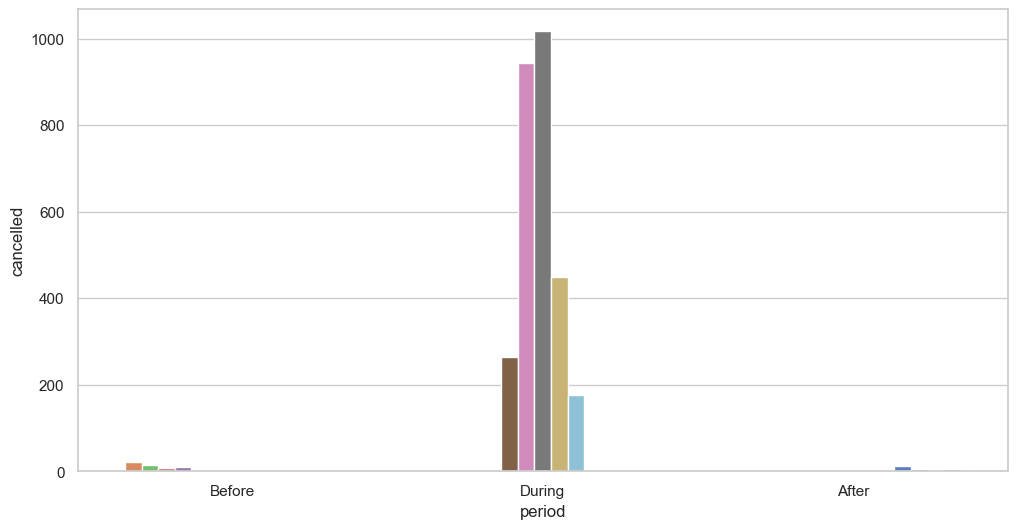

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='cancelled', hue='flight_date', data=combined_blizzard, palette='muted')
plt.title(f'Comparison of flight cancellations by blizzard periods by airports of origin')
plt.xlabel('Airport')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [48]:
df1 = df_merged_final.groupby(['flight_date','airport']).agg({
    'dep_delay': 'mean',
    'arr_delay': 'mean',
    'cancelled':'sum',
    'weather_tmin': 'mean',
    'weather_tmax': 'mean',
    'weather_prcp': 'mean',
    'weather_snow': 'mean',
    'weather_wdir': 'mean',
    'weather_wspd': 'mean',
    'weather_wpgt': 'mean',
    'weather_pres': 'mean',
    'weather_tsun': 'mean'
})
df1

dep_delay  arr_delay  cancelled  weather_tmin  \
flight_date airport                                                  
2016-01-01  DCA       6.452830  -1.408805          0           2.2   
            EWR       8.326923  -2.957692          0           1.1   
            IAD       7.476744  -5.270588          1          -1.0   
            JFK       6.378378   0.344961          0           2.2   
            LGA       8.397959  -7.698980          1           1.1   
...                        ...        ...        ...           ...   
2016-01-31  EWR       1.360784 -11.466667          0          -1.0   
            IAD       1.662338 -10.631579          1           1.1   
            JFK       2.333333  -6.316794          1           0.6   
            LGA       2.860870 -16.586957          0          -1.0   
            PHL       2.297753  -9.601124          0          -1.0   

                     weather_tmax  weather_prcp  weather_snow  weather_wdir  \
flight_date airport                                                           
2016-01-01  DCA               8.3           0.0           0.0         317.0   
            EWR               6.1           0.0           0.0         265.0   
            IAD               6.1           0.0           0.0         310.0   
            JFK               6.7           0.0           0.0         283.0   
            LGA               6.1           0.0           0.0         265.0   
...                           ...           ...           ...           ...   
2016-01-31  EWR              12.2           0.0         180.0         202.0   
            IAD              15.6           0.0         360.0         183.0   
            JFK               8.9           0.0         130.0         200.0   
            LGA              12.2           0.0         180.0         202.0   
            PHL              14.4           0.0         100.0         225.0   

                     weather_wspd  weather_wpgt  weather_pres  weather_tsun  
flight_date airport                                                          
2016-01-01  DCA              13.3           NaN        1020.5           NaN  
            EWR              20.5           NaN        1017.3           NaN  
            IAD              13.7           NaN        1020.2           NaN  
            JFK              23.4           NaN        1017.3           NaN  
            LGA              20.5           NaN        1017.3           NaN  
...                           ...           ...           ...           ...  
2016-01-31  EWR               7.9           NaN        1012.9           NaN  
            IAD              11.9           NaN        1012.8           NaN  
            JFK              13.7           NaN        1013.7           NaN  
            LGA               7.9           NaN        1012.9           NaN  
            PHL               8.6           NaN        1013.4           NaN  

[186 rows x 12 columns]

In [49]:
df1 = df1.reset_index()
df1

,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,2016-01-01,DCA,6.452830,-1.408805,0,2.2,8.3,0.0,0.0,317.0,13.3,NaN,1020.5,NaN
1,2016-01-01,EWR,8.326923,-2.957692,0,1.1,6.1,0.0,0.0,265.0,20.5,NaN,1017.3,NaN
2,2016-01-01,IAD,7.476744,-5.270588,1,-1.0,6.1,0.0,0.0,310.0,13.7,NaN,1020.2,NaN
3,2016-01-01,JFK,6.378378,0.344961,0,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN
4,2016-01-01,LGA,8.397959,-7.698980,1,1.1,6.1,0.0,0.0,265.0,20.5,NaN,1017.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2016-01-31,EWR,1.360784,-11.466667,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN
182,2016-01-31,IAD,1.662338,-10.631579,1,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN
183,2016-01-31,JFK,2.333333,-6.316794,1,0.6,8.9,0.0,130.0,200.0,13.7,NaN,1013.7,NaN
184,2016-01-31,LGA,2.860870,-16.586957,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN


In [126]:
df1.groupby('airport').agg({'cancelled' : sum})

/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/1514225294.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1.groupby('airport').agg({'cancelled' : sum})


,cancelled
airport,
DCA,609
EWR,824
IAD,250
JFK,482
LGA,542
PHL,345


In [50]:
df_merged_final[['cancelled','weather_snow','weather_prcp','dep_delay']].corr()

,cancelled,weather_snow,weather_prcp,dep_delay
cancelled,1.000000,0.463844,0.396672,0.028561
weather_snow,0.463844,1.000000,0.015413,0.041164
weather_prcp,0.396672,0.015413,1.000000,0.088877
dep_delay,0.028561,0.041164,0.088877,1.000000


/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


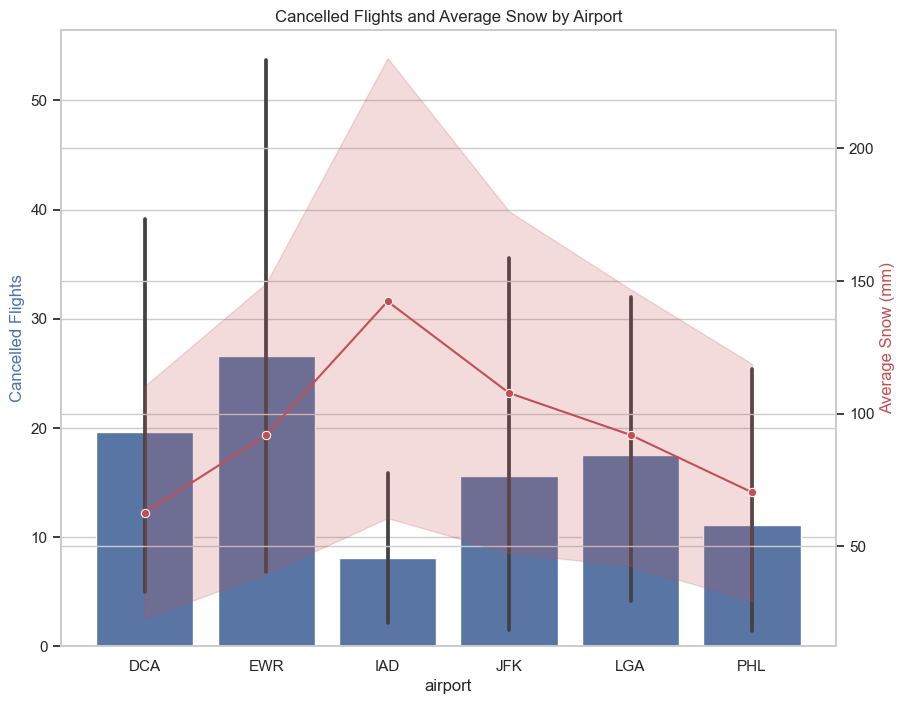

In [114]:
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x='airport', y='cancelled', data=df1, ax=ax1, color='b')
ax1.set_ylabel('Cancelled Flights', color='b')
ax1.set_title('Cancelled Flights and Average Snow by Airport')

# Create a second y-axis to plot weather_snow
ax2 = ax1.twinx()
sns.lineplot(x='airport', y='weather_snow', data=df1, ax=ax2, marker='o', color='r')
ax2.set_ylabel('Average Snow (mm)', color='r')

plt.show()

In [52]:
df1_before_blizzard= rows_by_dates(df1, '2016-01-17', '2016-01-21')
df1_before_blizzard

,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
96,2016-01-17,DCA,7.581522,7.032787,1,0.0,3.3,1.3,0.0,348.0,10.4,NaN,1010.6,NaN
97,2016-01-17,EWR,11.311404,15.464912,0,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN
98,2016-01-17,IAD,4.671233,-1.986301,0,-1.0,2.8,0.5,0.0,342.0,9.0,NaN,1010.3,NaN
99,2016-01-17,JFK,28.285156,37.265625,0,-0.5,6.1,1.3,0.0,344.0,16.9,NaN,1009.1,NaN
100,2016-01-17,LGA,9.380208,11.781250,0,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN
101,2016-01-17,PHL,4.410112,9.327684,0,-1.0,5.6,1.0,0.0,337.0,12.2,NaN,1009.9,NaN
102,2016-01-18,DCA,15.555556,10.787037,3,-8.8,1.1,0.0,0.0,296.0,28.4,NaN,1018.0,NaN
103,2016-01-18,EWR,16.891525,16.850847,0,-7.7,-1.0,0.8,30.0,277.0,27.7,NaN,1010.4,NaN
104,2016-01-18,IAD,6.265060,-3.722892,1,-9.9,0.0,0.0,0.0,298.0,30.2,NaN,1018.2,NaN
105,2016-01-18,JFK,18.827715,25.281955,1,-6.6,0.6,0.0,30.0,283.0,34.6,NaN,1010.3,NaN


In [53]:
df1_during_blizzard= rows_by_dates(df1, '2016-01-22', '2016-01-26')
df1_during_blizzard

,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
126,2016-01-22,DCA,11.992308,9.007752,98,-5.5,-1.6,13.0,0.0,20.0,18.7,NaN,1022.9,NaN
127,2016-01-22,EWR,19.435115,10.264368,40,-6.6,-1.0,0.8,0.0,5.0,16.6,NaN,1023.8,NaN
128,2016-01-22,IAD,3.860465,-4.333333,43,-9.9,-2.1,19.1,0.0,11.0,12.6,NaN,1022.7,NaN
129,2016-01-22,JFK,17.975904,7.572581,18,-6.0,-1.0,0.3,0.0,8.0,18.4,NaN,1023.9,NaN
130,2016-01-22,LGA,7.596899,2.112403,39,-6.6,-1.0,0.8,0.0,5.0,16.6,NaN,1023.8,NaN
131,2016-01-22,PHL,9.564417,10.150000,27,-6.0,-2.1,5.1,0.0,23.0,16.6,NaN,1024.0,NaN
132,2016-01-23,DCA,NaN,NaN,155,-4.3,-1.6,24.6,360.0,355.0,36.7,NaN,NaN,NaN
133,2016-01-23,EWR,NaN,NaN,184,-4.9,-2.7,46.0,180.0,19.0,36.7,NaN,1009.6,NaN
134,2016-01-23,IAD,NaN,NaN,59,-6.0,-1.6,47.8,380.0,345.0,31.0,NaN,1005.8,NaN
135,2016-01-23,JFK,49.000000,NaN,225,-3.2,-0.5,73.7,180.0,27.0,40.3,NaN,1007.4,NaN


In [54]:
df1_after_blizzard= rows_by_dates(df1, '2016-01-27', '2016-01-31')
df1_after_blizzard

,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
156,2016-01-27,DCA,1.697778,-4.613333,1,-0.5,8.9,0.0,100.0,333.0,15.5,NaN,1020.4,NaN
157,2016-01-27,EWR,5.650350,-3.706294,5,0.0,7.2,0.3,360.0,291.0,15.5,NaN,1017.0,NaN
158,2016-01-27,IAD,1.280488,-18.768293,2,-6.6,7.2,0.3,460.0,NaN,15.1,NaN,1020.3,NaN
159,2016-01-27,JFK,0.853755,-1.710317,1,-0.5,7.2,0.0,380.0,300.0,18.4,NaN,1017.1,NaN
160,2016-01-27,LGA,6.024390,9.421603,1,0.0,7.2,0.3,360.0,291.0,15.5,NaN,1017.0,NaN
161,2016-01-27,PHL,1.731183,-6.758065,1,-1.0,7.2,0.0,230.0,294.0,15.8,NaN,1018.8,NaN
162,2016-01-28,DCA,0.566372,-3.703540,3,-3.8,4.4,0.0,100.0,NaN,6.5,NaN,1014.0,NaN
163,2016-01-28,EWR,3.827243,-5.976744,0,-4.3,5.6,0.0,250.0,NaN,6.5,NaN,1013.6,NaN
164,2016-01-28,IAD,1.238095,-18.440476,1,-11.6,5.6,0.0,410.0,NaN,5.8,NaN,1013.6,NaN
165,2016-01-28,JFK,7.165441,-0.474265,0,-3.8,5.6,0.0,280.0,NaN,5.8,NaN,1014.0,NaN


In [55]:
df1_after_blizzard['period'] = 'After'
df1_during_blizzard['period'] = 'During'
df1_before_blizzard['period'] = 'Before'


/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/864569775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_after_blizzard['period'] = 'After'
/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/864569775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_during_blizzard['period'] = 'During'
/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/864569775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [56]:
combined_blizzard_1= pd.concat([df1_before_blizzard,df1_during_blizzard,df1_after_blizzard])
combined_blizzard_1

,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,period
96,2016-01-17,DCA,7.581522,7.032787,1,0.0,3.3,1.3,0.0,348.0,10.4,NaN,1010.6,NaN,Before
97,2016-01-17,EWR,11.311404,15.464912,0,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN,Before
98,2016-01-17,IAD,4.671233,-1.986301,0,-1.0,2.8,0.5,0.0,342.0,9.0,NaN,1010.3,NaN,Before
99,2016-01-17,JFK,28.285156,37.265625,0,-0.5,6.1,1.3,0.0,344.0,16.9,NaN,1009.1,NaN,Before
100,2016-01-17,LGA,9.380208,11.781250,0,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN,Before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2016-01-31,EWR,1.360784,-11.466667,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN,After
182,2016-01-31,IAD,1.662338,-10.631579,1,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,After
183,2016-01-31,JFK,2.333333,-6.316794,1,0.6,8.9,0.0,130.0,200.0,13.7,NaN,1013.7,NaN,After
184,2016-01-31,LGA,2.860870,-16.586957,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN,After


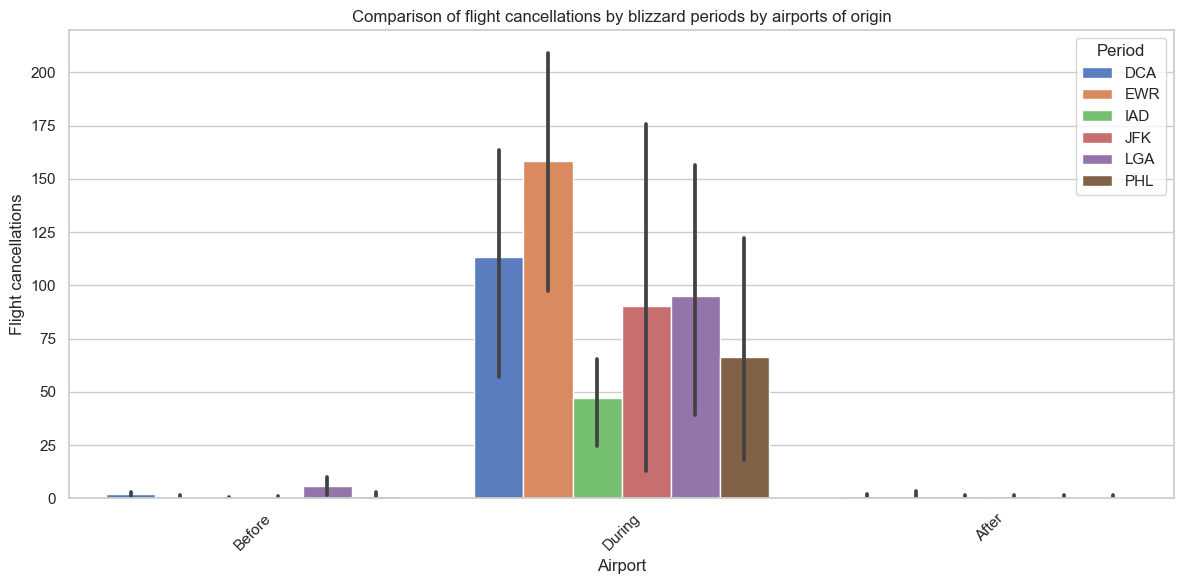

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='cancelled', hue='airport', data=combined_blizzard_1, palette='muted')
plt.title(f'Comparison of flight cancellations by blizzard periods by airports of origin')
plt.xlabel('Airport')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

work on dest of airports

In [61]:
df_merged_final_1 = pd.merge(df_f_a_merged,df_weather_final,left_on=['flight_date','dest'], right_on= ['weather_date','airport'])#,how = 'left')
df_merged_final_1

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,airport
0,2016-01-01,741.0,745,-4.0,1610.0,1602,8.0,AA,N3HMAA,44,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
1,2016-01-01,1306.0,1310,-4.0,1540.0,1600,-20.0,AA,N381AA,64,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
2,2016-01-01,1408.0,1330,38.0,1628.0,1603,25.0,AA,N5FHAA,76,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
3,2016-01-01,1353.0,1406,-13.0,1709.0,1730,-21.0,AA,N5EYAA,196,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
4,2016-01-01,1342.0,1342,0.0,1502.0,1500,2.0,AA,N796AA,198,...,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39239,2016-01-31,1012.0,1020,-8.0,1137.0,1201,-24.0,EV,N851AS,4995,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD
39240,2016-01-31,1513.0,1514,-1.0,1650.0,1649,1.0,EV,N851AS,4970,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD
39241,2016-01-31,1955.0,1955,0.0,2300.0,2322,-22.0,EV,N398CA,5251,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD
39242,2016-01-31,919.0,922,-3.0,1230.0,1253,-23.0,EV,N709EV,5151,...,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,IAD


In [62]:
df_merged_final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39244 entries, 0 to 39243
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          39244 non-null  datetime64[ns]
 1   dep_time             36199 non-null  float64       
 2   sched_dep_time       39244 non-null  int64         
 3   dep_delay            36199 non-null  float64       
 4   arr_time             36171 non-null  float64       
 5   sched_arr_time       39244 non-null  int64         
 6   arr_delay            36112 non-null  float64       
 7   airline              39244 non-null  object        
 8   tail_number          37848 non-null  object        
 9   flight_number        39244 non-null  int64         
 10  origin               39244 non-null  object        
 11  dest                 39244 non-null  object        
 12  air_time             36112 non-null  float64       
 13  actual_elapsed_time  36112 non-

In [63]:
df_dest= df_merged_final_1.groupby('flight_date').agg({
    'dep_delay': 'mean',
    'arr_delay': 'mean',
    'cancelled':'sum',
    'weather_tmin': 'mean',
    'weather_tmax': 'mean',
    'weather_prcp': 'mean',
    'weather_snow': 'mean',
    'weather_wdir': 'mean',
    'weather_wspd': 'mean',
    'weather_wpgt': 'mean',
    'weather_pres': 'mean',
    'weather_tsun': 'mean'
})

In [64]:
df_dest = df_dest.reset_index()
df_dest

,flight_date,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,2016-01-01,6.632833,-5.236749,7,1.345478,6.554785,0.000000,0.000000,282.743635,19.337050,NaN,1018.260140,NaN
1,2016-01-02,9.431405,3.993383,4,-0.430807,6.370264,0.000000,0.000000,258.585626,14.591845,NaN,1017.896870,NaN
2,2016-01-03,14.159398,7.254327,3,-1.007802,9.546887,0.000000,0.000000,245.692805,16.460015,NaN,1012.281095,NaN
3,2016-01-04,10.569176,7.823529,3,-8.944421,2.504578,0.000000,0.000000,330.781116,27.951216,NaN,1018.730973,NaN
4,2016-01-05,11.066059,4.395579,8,-11.084278,-0.332426,0.000000,0.000000,336.393376,16.146863,NaN,1035.355026,NaN
5,2016-01-06,6.564199,-0.742447,6,-8.206541,4.924211,0.000000,0.000000,219.833868,8.376767,NaN,1034.024211,NaN
6,2016-01-07,2.730938,-3.357616,8,-2.825748,7.255945,0.000000,0.000000,NaN,4.696280,NaN,1026.188549,NaN
7,2016-01-08,5.225185,-0.362491,6,0.956490,7.314971,0.048378,0.000000,34.562794,11.203097,NaN,1022.383186,NaN
8,2016-01-09,6.181624,-2.700855,6,4.300743,10.379724,1.565817,0.000000,44.052332,11.896603,NaN,1020.378238,NaN
9,2016-01-10,24.553705,21.710616,26,3.841537,16.969665,31.661243,0.000000,175.431725,27.284464,NaN,1002.113199,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

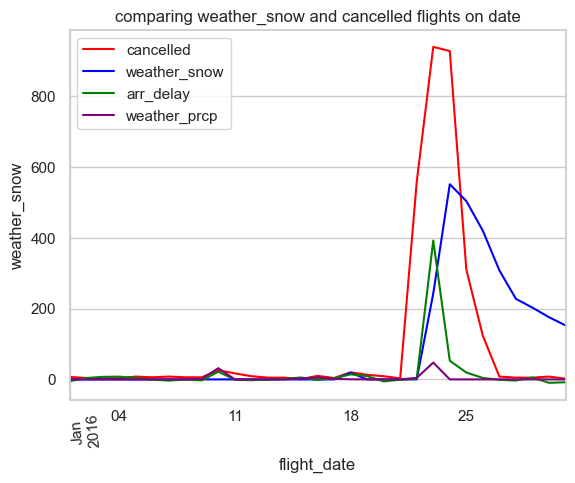

In [66]:
df_dest.plot(x="flight_date", y=["cancelled", "weather_snow","arr_delay","weather_prcp"], kind="line", rot=0,alpha = 1 ,color = ['red','blue','green','purple'])
plt.title(f'comparing weather_snow and cancelled flights on date')
plt.xlabel('flight_date')
plt.ylabel('weather_snow')
plt.xticks(rotation=95)
plt.show

In [76]:
df1_dest= df_merged_final_1.groupby(['flight_date','airport']).agg({
    'dep_delay': 'mean',
    'arr_delay': 'mean',
    'cancelled':'sum',
    'weather_tmin': 'mean',
    'weather_tmax': 'mean',
    'weather_prcp': 'mean',
    'weather_snow': 'mean',
    'weather_wdir': 'mean',
    'weather_wspd': 'mean',
    'weather_wpgt': 'mean',
    'weather_pres': 'mean',
    'weather_tsun': 'mean'
})

In [131]:
df1_dest =df1_dest.reset_index()
df1_dest

,level_0,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,0,0,2016-01-01,DCA,5.423313,-5.197531,2,2.2,8.3,0.0,0.0,317.0,13.3,NaN,1020.5,NaN
1,1,1,2016-01-01,EWR,8.100000,-3.657692,2,1.1,6.1,0.0,0.0,265.0,20.5,NaN,1017.3,NaN
2,2,2,2016-01-01,IAD,9.227273,-5.056818,2,-1.0,6.1,0.0,0.0,310.0,13.7,NaN,1020.2,NaN
3,3,3,2016-01-01,JFK,6.725191,-2.996183,0,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN
4,4,4,2016-01-01,LGA,5.616162,-9.161616,1,1.1,6.1,0.0,0.0,265.0,20.5,NaN,1017.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,181,181,2016-01-31,EWR,0.238281,-10.925781,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN
182,182,182,2016-01-31,IAD,6.358974,-8.217949,0,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN
183,183,183,2016-01-31,JFK,7.811538,-7.934615,1,0.6,8.9,0.0,130.0,200.0,13.7,NaN,1013.7,NaN
184,184,184,2016-01-31,LGA,4.350211,-5.561181,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN


In [133]:
df1_dest.groupby('airport').agg({'cancelled': sum})

/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/2766673583.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_dest.groupby('airport').agg({'cancelled': sum})


,cancelled
airport,
DCA,600
EWR,836
IAD,242
JFK,490
LGA,531
PHL,359


/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


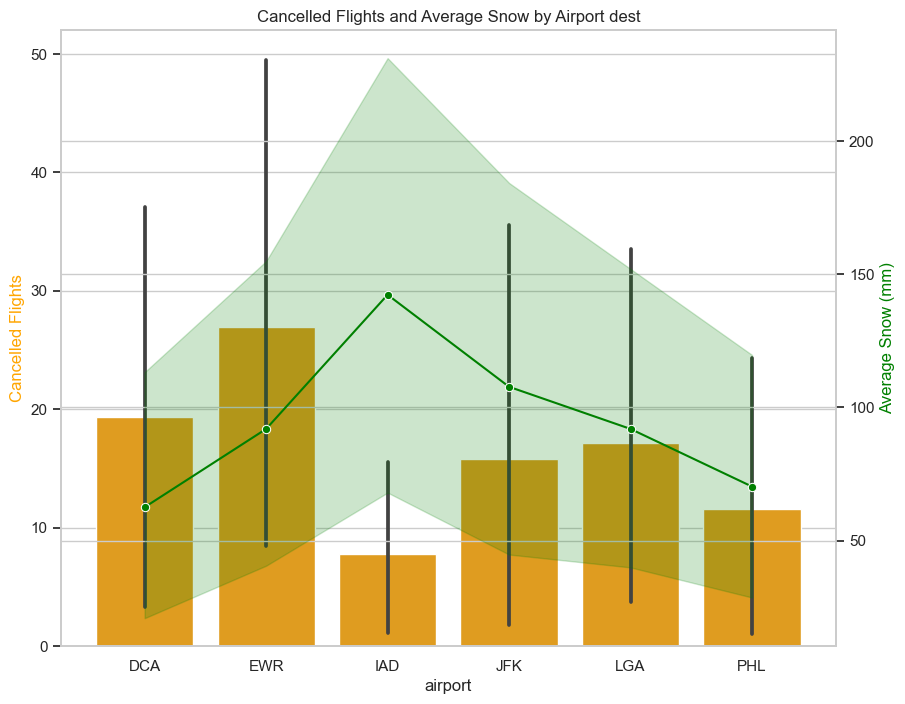

In [99]:
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x='airport', y='cancelled', data=df1_dest, ax=ax1, color='orange')
ax1.set_ylabel('Cancelled Flights', color='orange')
ax1.set_title('Cancelled Flights and Average Snow by Airport dest')

# Create a second y-axis to plot weather_snow
ax2 = ax1.twinx()
sns.lineplot(x='airport', y='weather_snow', data=df1_dest, ax=ax2, marker='o', color='green')
ax2.set_ylabel('Average Snow (mm)', color='green')

plt.show()

In [79]:
def rows_by_dates(df, start_date,end_date):
    # Convert start and end dates to datetime if they are not already
    #start_date = pd.to_datetime(start_date)
    #end_date = pd.to_datetime(end_date)
  return df[(df['flight_date'] >= start_date) & (df['flight_date'] <= end_date)]


In [80]:
df1_dest_before_blizzard= rows_by_dates(df1_dest, '2016-01-17', '2016-01-21')
df1_dest_before_blizzard.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,96,2016-01-17,DCA,11.270270,7.583784,1,0.0,3.3,1.3,0.0,348.0,10.4,NaN,1010.6,NaN
1,97,2016-01-17,EWR,8.767241,-1.081897,0,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN
2,98,2016-01-17,IAD,7.219178,-4.342466,0,-1.0,2.8,0.5,0.0,342.0,9.0,NaN,1010.3,NaN
3,99,2016-01-17,JFK,17.345382,12.678715,2,-0.5,6.1,1.3,0.0,344.0,16.9,NaN,1009.1,NaN
4,100,2016-01-17,LGA,11.505102,-1.328205,1,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN
5,101,2016-01-17,PHL,10.390805,-0.683908,0,-1.0,5.6,1.0,0.0,337.0,12.2,NaN,1009.9,NaN
6,102,2016-01-18,DCA,15.350230,10.419355,2,-8.8,1.1,0.0,0.0,296.0,28.4,NaN,1018.0,NaN
7,103,2016-01-18,EWR,14.510274,9.807560,1,-7.7,-1.0,0.8,30.0,277.0,27.7,NaN,1010.4,NaN
8,104,2016-01-18,IAD,8.916667,0.464286,0,-9.9,0.0,0.0,0.0,298.0,30.2,NaN,1018.2,NaN
9,105,2016-01-18,JFK,23.394737,11.684211,2,-6.6,0.6,0.0,30.0,283.0,34.6,NaN,1010.3,NaN


In [81]:
df1_dest_during_blizzard= rows_by_dates(df1_dest, '2016-01-22', '2016-01-26')
df1_dest_during_blizzard.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,126,2016-01-22,DCA,5.011765,2.072289,142,-5.5,-1.6,13.0,0.0,20.0,18.7,NaN,1022.9,NaN
1,127,2016-01-22,EWR,13.530928,4.891192,109,-6.6,-1.0,0.8,0.0,5.0,16.6,NaN,1023.8,NaN
2,128,2016-01-22,IAD,1.750000,-0.750000,66,-9.9,-2.1,19.1,0.0,11.0,12.6,NaN,1022.7,NaN
3,129,2016-01-22,JFK,13.005348,3.540107,81,-6.0,-1.0,0.3,0.0,8.0,18.4,NaN,1023.9,NaN
4,130,2016-01-22,LGA,10.853081,0.184834,86,-6.6,-1.0,0.8,0.0,5.0,16.6,NaN,1023.8,NaN
5,131,2016-01-22,PHL,8.396552,1.198276,74,-6.0,-2.1,5.1,0.0,23.0,16.6,NaN,1024.0,NaN
6,132,2016-01-23,DCA,NaN,NaN,152,-4.3,-1.6,24.6,360.0,355.0,36.7,NaN,NaN,NaN
7,133,2016-01-23,EWR,NaN,NaN,183,-4.9,-2.7,46.0,180.0,19.0,36.7,NaN,1009.6,NaN
8,134,2016-01-23,IAD,NaN,NaN,62,-6.0,-1.6,47.8,380.0,345.0,31.0,NaN,1005.8,NaN
9,135,2016-01-23,JFK,386.333333,392.000000,222,-3.2,-0.5,73.7,180.0,27.0,40.3,NaN,1007.4,NaN


In [82]:
df1_dest_after_blizzard= rows_by_dates(df1_dest, '2016-01-27', '2016-01-31')
df1_dest_after_blizzard.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,156,2016-01-27,DCA,2.115556,-1.560000,1,-0.5,8.9,0.0,100.0,333.0,15.5,NaN,1020.4,NaN
1,157,2016-01-27,EWR,4.611888,0.087413,5,0.0,7.2,0.3,360.0,291.0,15.5,NaN,1017.0,NaN
2,158,2016-01-27,IAD,2.337349,-2.915663,0,-6.6,7.2,0.3,460.0,NaN,15.1,NaN,1020.3,NaN
3,159,2016-01-27,JFK,6.556863,-0.631373,0,-0.5,7.2,0.0,380.0,300.0,18.4,NaN,1017.1,NaN
4,160,2016-01-27,LGA,8.668990,-0.132867,1,0.0,7.2,0.3,360.0,291.0,15.5,NaN,1017.0,NaN
5,161,2016-01-27,PHL,3.380435,-4.369565,1,-1.0,7.2,0.0,230.0,294.0,15.8,NaN,1018.8,NaN
6,162,2016-01-28,DCA,1.008811,-5.052863,2,-3.8,4.4,0.0,100.0,NaN,6.5,NaN,1014.0,NaN
7,163,2016-01-28,EWR,4.385621,-4.316993,0,-4.3,5.6,0.0,250.0,NaN,6.5,NaN,1013.6,NaN
8,164,2016-01-28,IAD,3.476744,-3.500000,1,-11.6,5.6,0.0,410.0,NaN,5.8,NaN,1013.6,NaN
9,165,2016-01-28,JFK,8.474265,2.488971,0,-3.8,5.6,0.0,280.0,NaN,5.8,NaN,1014.0,NaN


In [83]:
df1_dest_after_blizzard['period'] = 'After'
df1_dest_during_blizzard['period'] = 'During'
df1_dest_before_blizzard['period'] = 'Before'

/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/54993362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dest_after_blizzard['period'] = 'After'
/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/54993362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dest_during_blizzard['period'] = 'During'
/var/folders/qs/9qmybr8j59d_2f_2l8w_mtx80000gn/T/ipykernel_1193/54993362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [85]:
combined_blizzard_1_dest= pd.concat([df1_dest_before_blizzard,df1_dest_during_blizzard,df1_dest_after_blizzard])
combined_blizzard_1_dest

,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,period
96,2016-01-17,DCA,11.270270,7.583784,1,0.0,3.3,1.3,0.0,348.0,10.4,NaN,1010.6,NaN,Before
97,2016-01-17,EWR,8.767241,-1.081897,0,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN,Before
98,2016-01-17,IAD,7.219178,-4.342466,0,-1.0,2.8,0.5,0.0,342.0,9.0,NaN,1010.3,NaN,Before
99,2016-01-17,JFK,17.345382,12.678715,2,-0.5,6.1,1.3,0.0,344.0,16.9,NaN,1009.1,NaN,Before
100,2016-01-17,LGA,11.505102,-1.328205,1,-1.6,5.6,1.8,0.0,339.0,15.1,NaN,1009.0,NaN,Before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2016-01-31,EWR,0.238281,-10.925781,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN,After
182,2016-01-31,IAD,6.358974,-8.217949,0,1.1,15.6,0.0,360.0,183.0,11.9,NaN,1012.8,NaN,After
183,2016-01-31,JFK,7.811538,-7.934615,1,0.6,8.9,0.0,130.0,200.0,13.7,NaN,1013.7,NaN,After
184,2016-01-31,LGA,4.350211,-5.561181,0,-1.0,12.2,0.0,180.0,202.0,7.9,NaN,1012.9,NaN,After


In [110]:
melted_df = combined_blizzard_1_dest.melt(id_vars=['period', 'airport'], value_vars=['cancelled', 'weather_snow'], var_name='cancelled', value_name='weather_snow')

ValueError: value_name (weather_snow) cannot match an element in the DataFrame columns.

In [109]:
g = sns.FacetGrid(combined_blizzard_1_dest, col="cancelled", hue="airport", sharey=False, height=6, aspect=1.5)
g.map(sns.boxplot, "period", "weather_snow", palette="rainbow")
g.add_legend()

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Comparison of flight cancellations and weather_snow by blizzard periods by airports of dest')
plt.show()

/Users/nethravathyprabhu/miniconda3/envs/nf_sql/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: Axes.boxplot() got an unexpected keyword argument 'label'

Error in callback <function flush_figures at 0x1458a4dc0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

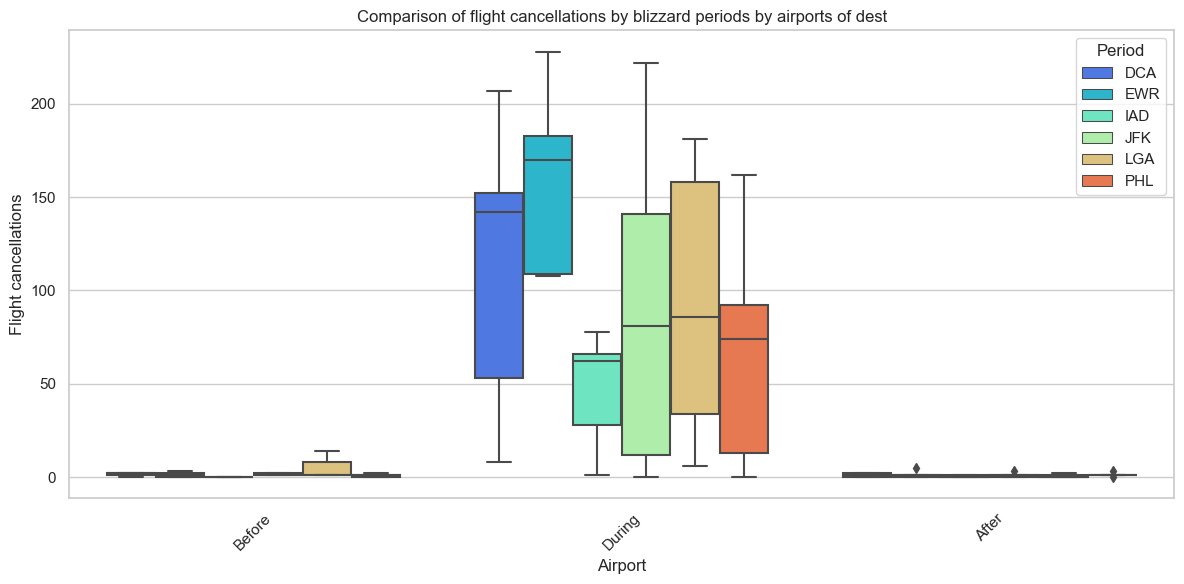

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='period', y='cancelled', hue='airport', data=combined_blizzard_1_dest, palette='rainbow')
plt.title(f'Comparison of flight cancellations by blizzard periods by airports of dest')
plt.xlabel('Airport')
plt.ylabel('Flight cancellations')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

linear regression for origin


In [68]:
import statsmodels.api as sm

In [351]:
# Prepare data for modeling
# Choose the predictor X and add a constant term
X = df_merged_final[['weather_snow']]
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
# Define dependent variable
y = df_merged_final.cancelled

display(X.head())
display(y.head())

,const,weather_snow
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


0    0
1    0
2    0
3    0
4    0
Name: cancelled, dtype: int64

In [352]:
 #Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()

In [353]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cancelled   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:55:32   Log-Likelihood:                 764.96
No. Observations:               39229   AIC:                            -1526.
Df Residuals:                   39227   BIC:                            -1509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0112      0.001      8.213      0.000       0.009       0.014
weather_snow     0.0007   7.17e-06    103.698      0.000       0.001       0.001
==============================================================================
Omnibus:                    17796.205   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94922.724
Skew:                           2.179   Prob(JB):                         0.00
Kurtosis:                       9.251   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#(combined_blizzard_1 is origin airport (17-01-2016 to 31-01-2016))
# Prepare data for modeling
# Choose the predictor X and add a constant term
X = combined_blizzard_1[['weather_snow']]     
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
# Define dependent variable
y = combined_blizzard_1.cancelled

display(X.head())
display(y.head())

,const,weather_snow
96,1.0,0.0
97,1.0,0.0
98,1.0,0.0
99,1.0,0.0
100,1.0,0.0


96     1
97     0
98     0
99     0
100    0
Name: cancelled, dtype: int64

In [70]:
#Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()

In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cancelled   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     21.88
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.04e-05
Time:                        10:07:58   Log-Likelihood:                -489.30
No. Observations:                  90   AIC:                             982.6
Df Residuals:                      88   BIC:                             987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3891      8.151      0.784      0.435      -9.810      22.588
weather_snow     0.1341      0.029      4.677      0.000       0.077       0.191
==============================================================================
Omnibus:                       32.203   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.645
Skew:                           1.540   Prob(JB):                     3.70e-12
Kurtosis:                       5.133   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#(combined_blizzard_1_dest is dest airport (17-01-2016 to 31-01-2016))
X = combined_blizzard_1_dest[['weather_snow']]     
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
# Define dependent variable
y = combined_blizzard_1_dest.cancelled

display(X.head())
display(y.head())

,const,weather_snow
96,1.0,0.0
97,1.0,0.0
98,1.0,0.0
99,1.0,0.0
100,1.0,0.0


96     1
97     0
98     0
99     2
100    1
Name: cancelled, dtype: int64

In [90]:
#Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()

In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cancelled   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     10.56
Date:                Tue, 23 Jul 2024   Prob (F-statistic):            0.00164
Time:                        10:13:11   Log-Likelihood:                -491.82
No. Observations:                  90   AIC:                             987.6
Df Residuals:                      88   BIC:                             992.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.8870      8.383      1.657      0.101      -2.772      30.546
weather_snow     0.0959      0.029      3.250      0.002       0.037       0.154
==============================================================================
Omnibus:                       32.770   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.156
Skew:                           1.630   Prob(JB):                     4.73e-12
Kurtosis:                       4.810   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Prepare data for modeling
# Choose the predictor X and add a constant term
X = df1_dest_during_blizzard[['weather_snow']]
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
# Define dependent variable
y = df1_dest_during_blizzard.cancelled

display(X.head())
display(y.head())

,const,weather_snow
126,1.0,0.0
127,1.0,0.0
128,1.0,0.0
129,1.0,0.0
130,1.0,0.0


126    142
127    109
128     66
129     81
130     86
Name: cancelled, dtype: int64

In [101]:
#Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()

In [103]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cancelled   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7742
Date:                Tue, 23 Jul 2024   Prob (F-statistic):              0.386
Time:                        10:39:02   Log-Likelihood:                -170.16
No. Observations:                  30   AIC:                             344.3
Df Residuals:                      28   BIC:                             347.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          113.4093     24.562      4.617      0.000      63.096     163.723
weather_snow    -0.0512      0.058     -0.880      0.386      -0.170       0.068
==============================================================================
Omnibus:                        4.636   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                2.201
Skew:                           0.367   Prob(JB):                        0.333
Kurtosis:                       1.895   Cond. No.                         780.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

linear regression for dest

In [356]:
# Prepare data for modeling
# Choose the predictor X and add a constant term
X = df_merged_final_1[['weather_snow']]
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
# Define dependent variable
y = df_merged_final_1.cancelled

display(X.head())
display(y.head())

,const,weather_snow
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


0    0
1    0
2    0
3    0
4    0
Name: cancelled, dtype: int64

In [357]:
#Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results_1 = model.fit()

In [358]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cancelled   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     6593.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:58:59   Log-Likelihood:                -969.43
No. Observations:               39244   AIC:                             1943.
Df Residuals:                   39242   BIC:                             1960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0234      0.001     16.432      0.000       0.021       0.026
weather_snow     0.0006   7.49e-06     81.199      0.000       0.001       0.001
==============================================================================
Omnibus:                    20211.907   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115396.349
Skew:                           2.524   Prob(JB):                         0.00
Kurtosis:                       9.714   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--------------------------------------------------------------------------------

##No need for now

In [ ]:
#df.loc[ ['William','Paul','Anne'], :]
#set = df.loc[df[ 'name' ] == 'Anna']
#set

In [178]:
df_PHL = df1.loc[df1['airport'] == 'PHL']
df_PHL.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,5,2016-01-01,PHL,3.927632,-4.500000,0,1.1,6.1,0.0,0.0,283.0,18.7,NaN,1019.2,NaN
1,11,2016-01-02,PHL,6.390110,-6.181319,1,-0.5,6.7,0.0,0.0,276.0,11.5,NaN,1018.6,NaN
2,17,2016-01-03,PHL,9.990000,4.255000,0,-1.0,10.0,0.0,0.0,260.0,15.1,NaN,1012.9,NaN
3,23,2016-01-04,PHL,11.687805,-5.834146,0,-9.9,2.8,0.0,0.0,335.0,25.9,NaN,1019.5,NaN
4,29,2016-01-05,PHL,10.523810,-7.264550,1,-11.0,0.0,0.0,0.0,342.0,13.7,NaN,1035.8,NaN
5,35,2016-01-06,PHL,4.000000,-7.624339,0,-7.7,4.4,0.0,0.0,235.0,7.6,NaN,1034.6,NaN
6,41,2016-01-07,PHL,1.979381,-13.030928,0,-2.1,7.2,0.0,0.0,NaN,2.2,NaN,1026.4,NaN
7,47,2016-01-08,PHL,4.937173,-7.413613,0,2.2,7.2,0.0,0.0,39.0,9.4,NaN,1022.0,NaN
8,53,2016-01-09,PHL,4.681818,-4.870130,1,5.6,12.2,0.0,0.0,58.0,12.2,NaN,1020.0,NaN
9,59,2016-01-10,PHL,8.754190,1.206704,1,4.4,18.3,16.0,0.0,202.0,27.4,NaN,1001.5,NaN


In [177]:
df_LGA = df1.loc[df1['airport'] == 'LGA']
df_LGA.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,4,2016-01-01,LGA,8.397959,-7.698980,1,1.1,6.1,0.0,0.0,265.0,20.5,NaN,1017.3,NaN
1,10,2016-01-02,LGA,11.820961,-11.930131,0,-1.0,5.6,0.0,0.0,254.0,15.1,NaN,1017.2,NaN
2,16,2016-01-03,LGA,10.021008,-1.710084,0,-2.1,8.3,0.0,0.0,247.0,16.6,NaN,1011.6,NaN
3,22,2016-01-04,LGA,5.854478,-6.339552,1,-9.9,1.7,0.0,0.0,325.0,27.7,NaN,1018.1,NaN
4,28,2016-01-05,LGA,8.700348,4.017422,3,-12.1,-0.5,0.0,0.0,329.0,15.8,NaN,1034.9,NaN
5,34,2016-01-06,LGA,8.665505,-11.458042,2,-9.3,5.6,0.0,0.0,223.0,8.6,NaN,1033.6,NaN
6,40,2016-01-07,LGA,2.523649,-18.206081,2,-4.3,7.8,0.0,0.0,NaN,5.4,NaN,1026.1,NaN
7,46,2016-01-08,LGA,0.474576,-9.921502,2,-0.5,7.2,0.0,0.0,35.0,13.0,NaN,1022.5,NaN
8,52,2016-01-09,LGA,1.457831,-13.222892,1,3.3,8.9,0.3,0.0,32.0,10.8,NaN,1021.1,NaN
9,58,2016-01-10,LGA,29.146018,23.120000,10,3.9,18.3,45.0,0.0,146.0,24.8,NaN,1002.2,NaN


In [176]:
df_IAD = df1.loc[df1['airport'] == 'IAD']
df_IAD.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,2,2016-01-01,IAD,7.476744,-5.270588,1,-1.0,6.1,0.0,0.0,310.0,13.7,NaN,1020.2,NaN
1,8,2016-01-02,IAD,7.670455,-11.090909,0,-2.7,9.4,0.0,0.0,NaN,7.2,NaN,1019.0,NaN
2,14,2016-01-03,IAD,6.979167,-7.000000,0,-4.9,12.2,0.0,0.0,NaN,7.9,NaN,1013.4,NaN
3,20,2016-01-04,IAD,8.070000,-12.580000,0,-6.6,2.8,0.0,0.0,335.0,24.5,NaN,1020.4,NaN
4,26,2016-01-05,IAD,11.295455,-10.238636,0,-10.5,0.0,0.0,0.0,NaN,12.2,NaN,1036.4,NaN
5,32,2016-01-06,IAD,18.929412,-0.188235,0,-12.7,4.4,0.0,0.0,NaN,3.2,NaN,1034.2,NaN
6,38,2016-01-07,IAD,8.744186,-15.220930,0,-4.9,5.0,0.0,0.0,NaN,2.2,NaN,1025.7,NaN
7,44,2016-01-08,IAD,3.964286,-15.530120,1,2.2,5.6,0.8,0.0,NaN,3.2,NaN,1021.1,NaN
8,50,2016-01-09,IAD,3.379310,-13.120690,1,4.4,10.0,6.1,0.0,NaN,3.2,NaN,1018.4,NaN
9,56,2016-01-10,IAD,14.787500,-3.975000,1,1.1,15.0,25.4,0.0,237.0,20.5,NaN,NaN,NaN


In [175]:
df_EWR = df1.loc[df1['airport'] == 'EWR']
df_EWR.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,1,2016-01-01,EWR,8.326923,-2.957692,0,1.1,6.1,0.0,0.0,265.0,20.5,NaN,1017.3,NaN
1,7,2016-01-02,EWR,11.988806,-6.052239,2,-1.0,5.6,0.0,0.0,254.0,15.1,NaN,1017.2,NaN
2,13,2016-01-03,EWR,15.436893,5.620130,3,-2.1,8.3,0.0,0.0,247.0,16.6,NaN,1011.6,NaN
3,19,2016-01-04,EWR,17.940299,-0.997015,0,-9.9,1.7,0.0,0.0,325.0,27.7,NaN,1018.1,NaN
4,25,2016-01-05,EWR,13.894915,-4.362712,0,-12.1,-0.5,0.0,0.0,329.0,15.8,NaN,1034.9,NaN
5,31,2016-01-06,EWR,8.778912,-7.619048,1,-9.3,5.6,0.0,0.0,223.0,8.6,NaN,1033.6,NaN
6,37,2016-01-07,EWR,4.565217,-13.916107,1,-4.3,7.8,0.0,0.0,NaN,5.4,NaN,1026.1,NaN
7,43,2016-01-08,EWR,8.713805,-8.346801,1,-0.5,7.2,0.0,0.0,35.0,13.0,NaN,1022.5,NaN
8,49,2016-01-09,EWR,5.027174,-9.391304,0,3.3,8.9,0.3,0.0,32.0,10.8,NaN,1021.1,NaN
9,55,2016-01-10,EWR,22.238866,10.795918,3,3.9,18.3,45.0,0.0,146.0,24.8,NaN,1002.7,NaN


In [170]:
df_DCA = df1.loc[df1['airport'] == 'DCA']
df_DCA.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,0,2016-01-01,DCA,6.452830,-1.408805,0,2.2,8.3,0.0,0.0,317.0,13.3,NaN,1020.5,NaN
1,6,2016-01-02,DCA,4.392045,-7.795455,0,0.0,8.9,0.0,0.0,224.0,10.1,NaN,1019.4,NaN
2,12,2016-01-03,DCA,13.057292,5.859375,2,0.0,12.2,0.0,0.0,210.0,12.6,NaN,1013.7,NaN
3,18,2016-01-04,DCA,6.155963,-5.013761,0,-6.0,3.3,0.0,0.0,338.0,27.0,NaN,1020.3,NaN
4,24,2016-01-05,DCA,5.268182,-5.753425,1,-8.8,1.1,0.0,0.0,335.0,16.6,NaN,1036.5,NaN
5,30,2016-01-06,DCA,2.013393,-7.318386,1,-6.6,4.4,0.0,0.0,182.0,6.1,NaN,1034.6,NaN
6,36,2016-01-07,DCA,0.235556,-11.540179,3,1.1,6.1,0.0,0.0,NaN,4.3,NaN,1026.3,NaN
7,42,2016-01-08,DCA,5.627803,-1.382883,4,4.4,7.2,0.0,0.0,28.0,7.2,NaN,NaN,NaN
8,48,2016-01-09,DCA,-2.657895,-10.230263,1,5.0,10.0,5.8,0.0,24.0,7.6,NaN,1018.6,NaN
9,54,2016-01-10,DCA,15.554455,10.485149,3,2.8,16.7,14.2,0.0,230.0,27.4,NaN,1001.7,NaN


In [174]:
df_JFK = df1.loc[df1['airport'] == 'JFK']
df_JFK.reset_index()

,index,flight_date,airport,dep_delay,arr_delay,cancelled,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun
0,3,2016-01-01,JFK,6.378378,0.344961,0,2.2,6.7,0.0,0.0,283.0,23.4,NaN,1017.3,NaN
1,9,2016-01-02,JFK,13.951852,0.200000,0,1.1,5.0,0.0,0.0,277.0,20.9,NaN,1017.4,NaN
2,15,2016-01-03,JFK,18.619377,19.844291,0,1.7,8.9,0.0,0.0,258.0,22.7,NaN,1011.8,NaN
3,21,2016-01-04,JFK,19.612676,7.657244,1,-9.3,3.3,0.0,0.0,333.0,32.0,NaN,1017.7,NaN
4,27,2016-01-05,JFK,13.684426,-3.053279,5,-11.0,-1.6,0.0,0.0,351.0,19.8,NaN,1034.7,NaN
5,33,2016-01-06,JFK,11.534137,-1.522088,1,-6.0,4.4,0.0,0.0,235.0,12.2,NaN,1034.0,NaN
6,39,2016-01-07,JFK,8.117424,-13.200758,0,-2.7,7.8,0.0,0.0,NaN,6.1,NaN,1026.3,NaN
7,45,2016-01-08,JFK,6.443580,-13.062500,0,0.0,8.3,0.0,0.0,36.0,14.4,NaN,1022.8,NaN
8,51,2016-01-09,JFK,7.589286,-2.772321,0,4.4,11.7,0.5,0.0,66.0,18.7,NaN,1021.3,NaN
9,57,2016-01-10,JFK,54.515385,50.511538,10,5.0,14.4,32.5,0.0,152.0,33.8,NaN,1002.2,NaN


In [152]:
df1 = df1.reset_index()

In [ ]:
# function for cancellation calculationn
def cancellation_cal(df_data, df_name, date1, date2):
    df_name = df_data[(df_data['flight_date']>=f'{date1}') & (df_data['flight_date'] <= f'{date2}')]
    num_cancelled_sum = df_name['cancelled'].sum()
    print('number of cancelled flight using sum:', num_cancelled_sum)
    total_flights = df_name['cancelled'].shape[0]
    print('total flights: ', total_flights)
    percentage_of_flights_cancelled_sum = round((num_cancelled_sum/total_flights)*100,1)
    print('percentage of flights cancelled using sum: ', percentage_of_flights_cancelled_sum)